In [1]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# 读取数据
df = pd.read_html("Data_View.html", index_col='Unnamed: 0')[6]
df['FROMTIME'] = pd.to_datetime(df['FROMTIME'])
df.set_index('FROMTIME', inplace=True)

In [4]:
# 按照设备ID和时间间隔进行汇总
df_grouped = df.groupby(['DEVICEID', pd.Grouper(freq='5T')]).sum()['COUNT']

# 提取指定设备ID的流量数据
device_id = 3603
data = df_grouped.loc[device_id]

In [5]:
# 拆分训练集和测试集
train_data = data[:-12]  # 使用前30天的数据作为训练集
test_data = data[-12:]  # 使用最后12个数据点作为测试集

In [6]:
# 创建自回归模型并训练
model = AutoReg(train_data, lags=4)
model_fit = model.fit()

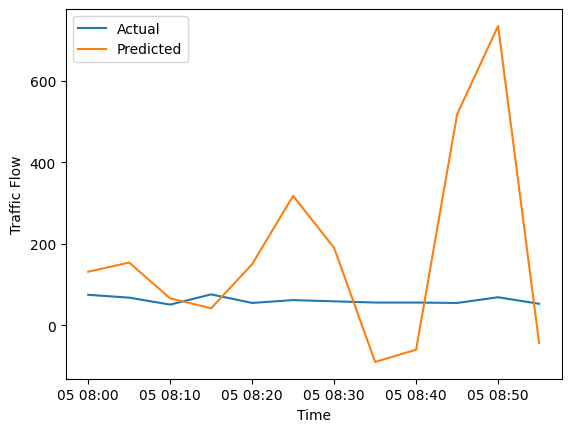

In [7]:
# 进行预测
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# 可视化结果
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()